0.005000000000000001 -0.005000000000000001 -0.05000000000000001
[ 0.00000000e+00  1.25333234e-01  2.48689887e-01  3.68124553e-01
  4.81753674e-01  5.87785252e-01  6.84547106e-01  7.70513243e-01
  8.44327926e-01  9.04827052e-01  9.51056516e-01  9.82287251e-01
  9.98026728e-01  9.98026728e-01  9.82287251e-01  9.51056516e-01
  9.04827052e-01  8.44327926e-01  7.70513243e-01  6.84547106e-01
  5.87785252e-01  4.81753674e-01  3.68124553e-01  2.48689887e-01
  1.25333234e-01 -3.21624530e-16 -1.25333234e-01 -2.48689887e-01
 -3.68124553e-01 -4.81753674e-01 -5.87785252e-01 -6.84547106e-01
 -7.70513243e-01 -8.44327926e-01 -9.04827052e-01 -9.51056516e-01
 -9.82287251e-01 -9.98026728e-01 -9.98026728e-01 -9.82287251e-01
 -9.51056516e-01 -9.04827052e-01 -8.44327926e-01 -7.70513243e-01
 -6.84547106e-01 -5.87785252e-01 -4.81753674e-01 -3.68124553e-01
 -2.48689887e-01 -1.25333234e-01  6.43249060e-16  1.25333234e-01
  2.48689887e-01  3.68124553e-01  4.81753674e-01  5.87785252e-01
  6.84547106e-01  7.705132

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in multiply


Streaming output truncated to the last 5000 lines.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan

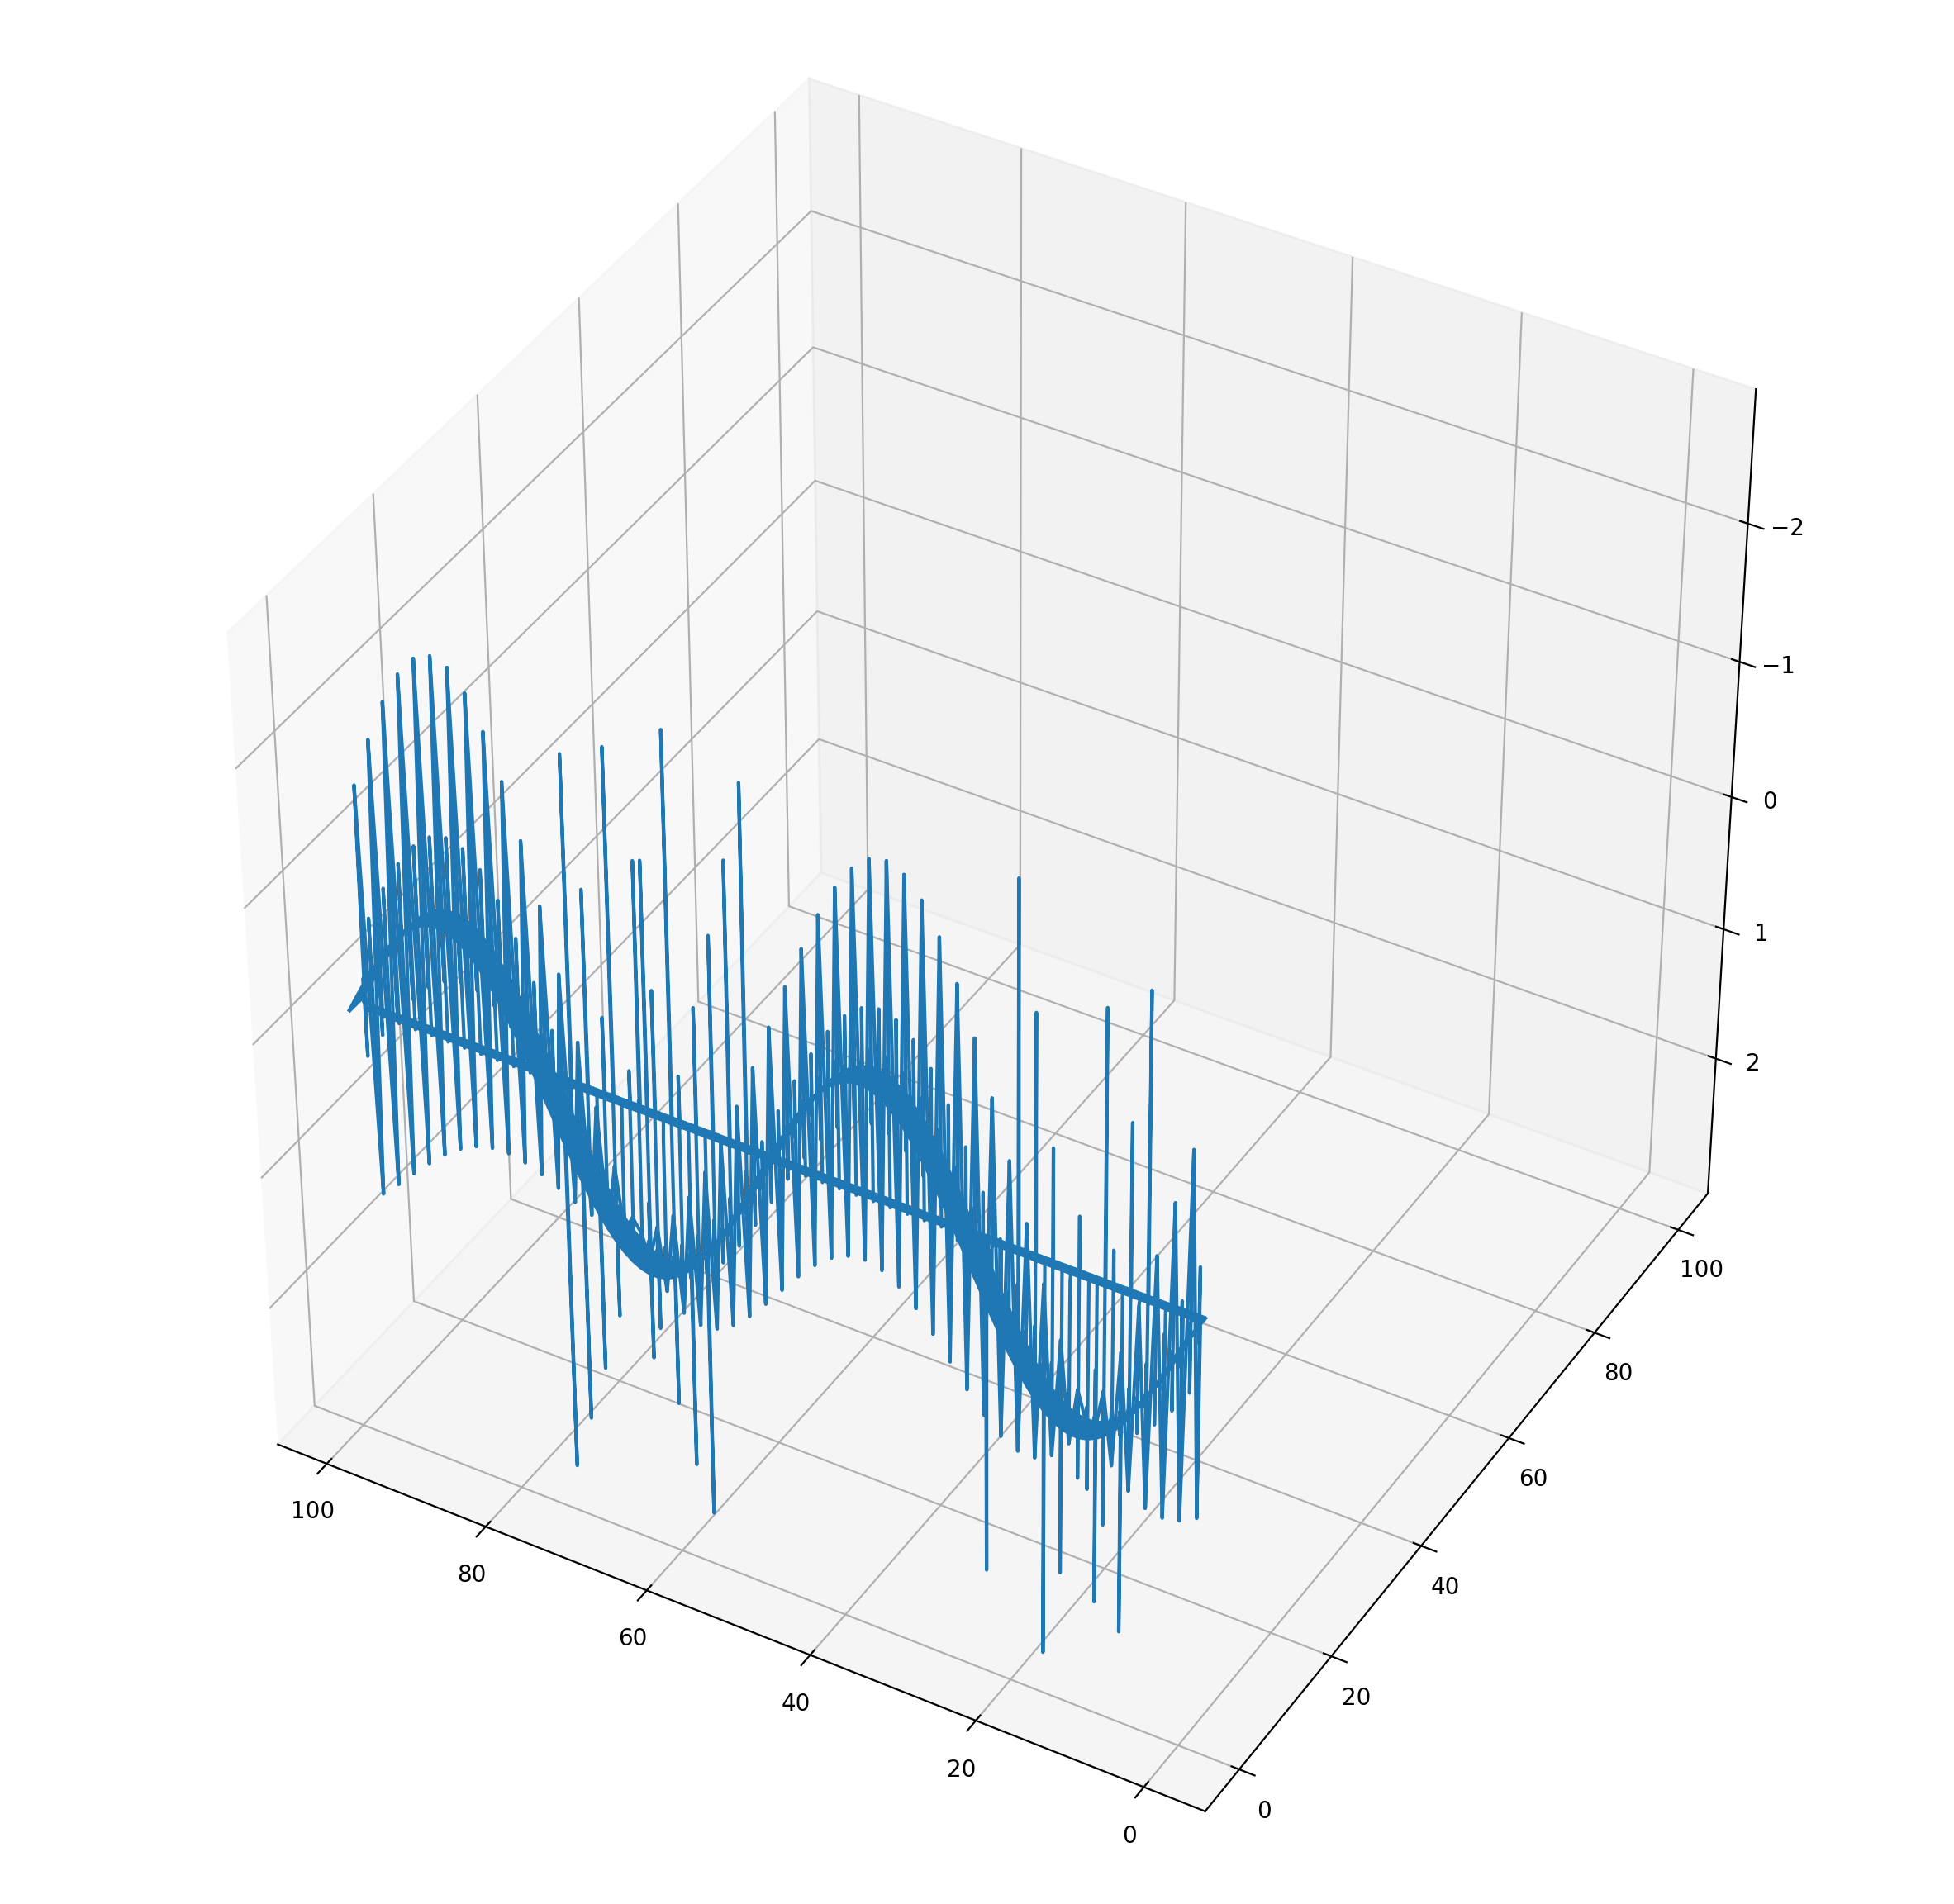

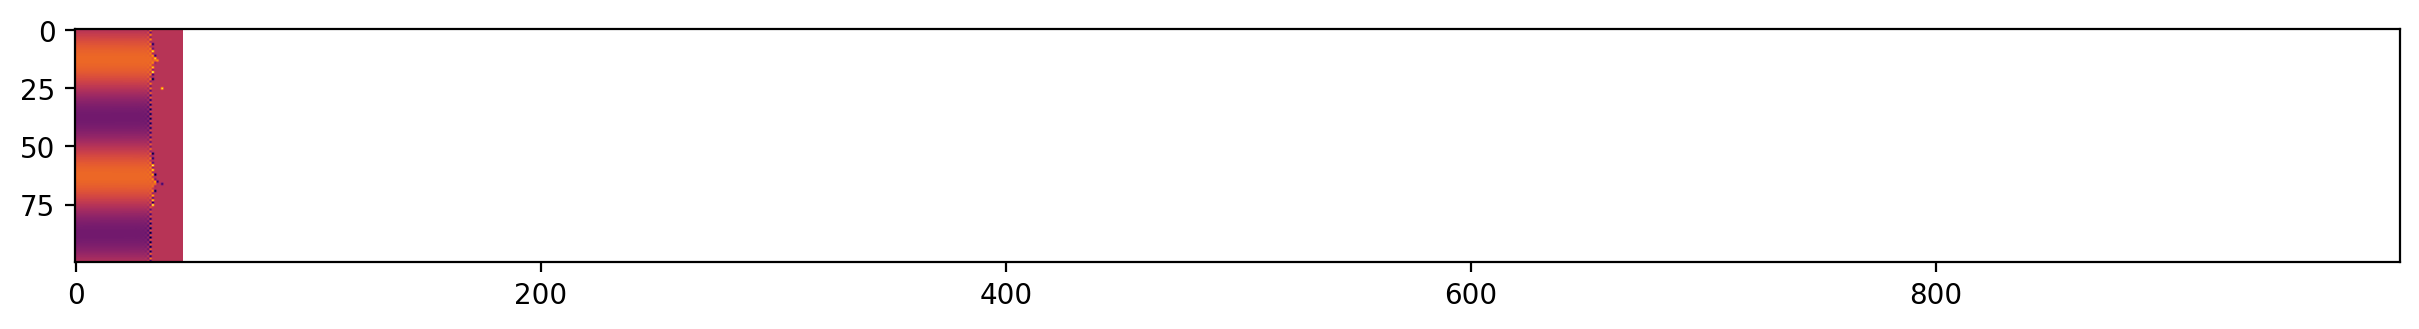

In [ ]:
#The Kuramoto-Sivashinsky (KS) equation is a nonlinear fourth-order PDE which is used as a basic model for flame propagation.
#However, its popularity stems from its strange analytic properties. It is one of the simplest PDEs with chaotic behaviour, yet
#the solutions seeingly remain bounded. Very little is known about these two observations. On the other hand, the terms in the
#PDE are easily explained: the negative diffusive heat term amplifies frequencies to create instability, the fourth-order term pushes
#these frequencies to 1 to prevent divergence, and the nonlinear term moves these wave-structures around and causes chaos. This script
#unsuccessfully implements a finite-difference method which in unstable due to the choice of stencils. I tried a few and none worked
#for a wide range of parameters. For specific choices which I do not remember, it does work and yields beautiful chaos.


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

n=100 #spatial resolution 200
m=1000 #temporal resolution 5000
lx=100 #200
lt=100 #10

dx=lx/n
dt=lt/m*0.02 #*5
nu=10 #10

mu=dt/np.power(dx,2)
gamma=-dt/dx
beta=-nu*dt/np.power(dx,4)
#mu=dt/np.power(dx,2)
#gamma=dt/(2*dx)
#beta=-dt*nu/np.power(dx,4)


print(mu,gamma,beta)

X=np.zeros((n,m))
X[:,0]=1*np.sin(np.linspace(0,4*np.pi,n,endpoint=False))
#X[50:75,0]=1

#A=np.diagflat((1+2*mu)*np.ones((n,1)))-mu*np.diagflat(np.ones((n-1,1)),1)-mu*np.diagflat(np.ones((n-1,1)),-1)
#B=np.linalg.inv(A)

for i in range(0,m-1):
  u=X[:,i]

  #dx=lx/n
  #dt=lt/m*5 #*5
  #nu=0 #10

  #mu=dt/np.power(dx,2)
  #gamma=-dt/dx
  #beta=-nu*dt/np.power(dx,4)
  
  A=np.diagflat(beta*np.ones((n-2,1)),-2) + np.diagflat((-mu-4*beta)*np.ones((n-1,1)),-1) + np.diagflat(-gamma*u+6*beta+2*mu) + np.diagflat(gamma*u[:-1]-mu-4*beta,1) + np.diagflat(beta*np.ones((n-2,1)),2)
  #A=np.diagflat(2*mu*np.ones((n,1))+28/3*beta)
  #A+=np.diagflat(-mu-gamma*u[:-1]-13/2*beta,1)
  #A+=np.diagflat(2*beta*np.ones((n-2,1)),2)
  #A+=np.diagflat(-1/6*beta*np.ones((n-3,1)),3)
  #A+=np.diagflat(-mu+gamma*u[1:]-13/2*beta,-1)
  #A+=np.diagflat(2*beta*np.ones((n-2,1)),-2)
  #A+=np.diagflat(-1/6*beta*np.ones((n-3,1)),-3)
  
  A[0,-1]=-mu-4*beta
  A[0,-2]=beta
  A[1,-1]=beta
  A[-1,0]=gamma*u[-1]-mu-4*beta
  A[-1,1]=beta
  A[-2,0]=beta
  
  #A[0,-1]=-mu+gamma*u[0]-13/2*beta
  #A[0,-2]=2*beta
  #A[0,-3]=-1/6*beta
  #A[1,-1]=2*beta
  #A[1,-2]=-1/6*beta
  #A[2,-1]=-1/6*beta

  #A[-1,0]-mu-gamma*u[-1]-13/2*beta
  #A[-1,1]=2*beta
  #A[-1,2]=-1/6*beta
  #A[-2,0]=2*beta
  #A[-2,1]=-1/6*beta
  #A[-3,0]=-1/6*beta
  #print(np.round(A,2))
  #if(np.isnan(A).any()):
  #  break
  #print(np.round(np.min(np.abs(np.linalg.eigvals(A))),2),np.round(np.max(np.abs(np.linalg.eigvals(A))),2))
  #print(np.round(X[:,i],3))
  #A=np.linalg.inv(A)
  #X[:,i+1]=u+np.matmul(A,X[:,i])
  #X[0,i+1]=0; X[-1,i+1]=0

  X[:,i+1]=X[:,i]-dt*(fftpack.diff(X[:,i],order=2,period=lx) + np.multiply(X[:,i],fftpack.diff(X[:,i],period=lx)) + nu*fftpack.diff(X[:,i],order=4,period=lx))
  print(X[:,i])

#plt.plot(np.linspace(0,lx,n,endpoint=False),X[:,0])
#plt.plot(np.linspace(0,lx,n,endpoint=False),fftpack.diff(X[:,0],order=1,period=lx))

fig=plt.figure(dpi=200,figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
X[np.abs(X)>3]=0
x,y=np.meshgrid(np.linspace(0,lx,n,endpoint=False),np.linspace(0,lt,m,endpoint=False))
ax.plot_wireframe(x,y,np.transpose(X),rstride=4)
ax.view_init(-140, 60)

fig2=plt.figure(dpi=200,figsize=(15,15))
ax = fig2.add_subplot(111)
plt.imshow(X,cmap='inferno',aspect="equal")